In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [72]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [73]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

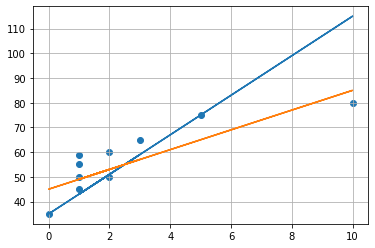

In [74]:
a = 8
b = 35
plt.scatter(X[1,:], y)
# y = a*x + b
plt.plot(X[1, :], a*X[1, :] + b)
plt.plot(X[1, :], 4*X[1, :] + 45)
plt.grid()

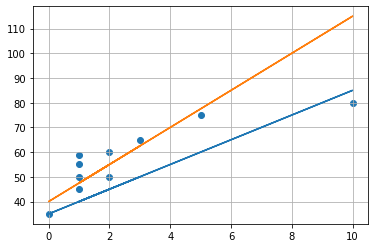

In [75]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*X[0] + X[1]*5)
plt.plot(X[1], 40*X[0] + X[1]*7.5)
plt.grid()

# mse - mean squared error
# mae - mean absolute error

In [76]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [77]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [78]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

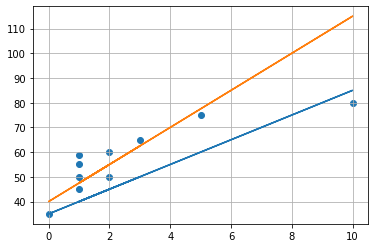

In [79]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1)
plt.plot(X[1], y_pred2)
plt.grid()

In [80]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

In [81]:
err1, err2

(9.4, -2.1)

In [82]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [83]:
mae_1, mae_2

(10.4, 7.9)

In [84]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [85]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [86]:
X.shape

(2, 10)

In [87]:
X.T.shape

(10, 2)

In [88]:
W = np.linalg.inv(X @ X.T) @ X @ y
W

array([47.23214286,  3.91071429])

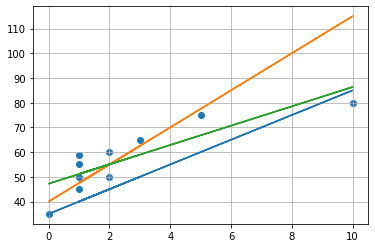

In [89]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])
plt.grid()

In [90]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [91]:
calc_mse(y, y_pred1)

143.6

In [92]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [93]:
calc_mae(y, y_pred1)

10.4

In [94]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [95]:
calc_mse(y, y_pred3)

45.93749999999999

In [96]:
calc_mae(y, y_pred3)

6.182142857142858

Градиентный спуск

np.mean(y_pred - y)**2
np.mean(w*x - y)**2
np.sum(w*x - y)**2 / n
1/n * np.sum((w*x - y)**2)
(w*x - y)**2

2*z`

2*x*(w*x - y) 
2*x*(w*x - y)

In [288]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [289]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [290]:
W[0] - g


47.22834049674359

1. Подберите скорость обучения (alpha) и количество итераций:  
*3  введем lim (приращение mse), параметр, при достижении которого произойдет остановка.

In [365]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W_1 = np.array([1, 0.5])
err_prev = 0
errors = []
lim = 0.001  # mse increment
W, alpha, n,

(array([1. , 0.5]), 0.0001, 10)

In [366]:
for i in range(30000):
# for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    if abs(err - err_prev) <= lim:  # остановка по достижению предела
        print("*" * 30)
        print(i, W, err)
        break
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)
        errors.append(err)
    err_prev = err

0 [1.01102 0.534  ] 3173.15
100 [2.02168794 3.452835  ] 2207.6942101483005
200 [2.88306663 5.58962851] 1670.7027004086372
300 [3.63289519 7.14848061] 1368.0832412796256
400 [4.29908617 8.28027926] 1193.7493344933293
500 [4.90228732 9.09657298] 1089.714750358689
600 [5.45777535 9.67982684] 1024.2828984889416
700 [ 5.97685612 10.0910047 ] 980.1260644155933
800 [ 6.46789973 10.37517467] 947.770026039189
900 [ 6.93710574 10.56565326] 922.0330206910179
1000 [ 7.38906894 10.68706909] 900.0794345405571
1100 [ 7.82719761 10.75762786] 880.3560305497828
1200 [ 8.25402271 10.7907869 ] 862.0105344693482
1300 [ 8.67142649 10.79649311] 844.5738572427321
1400 [ 9.08081151 10.78209811] 827.7864098809556
1500 [ 9.48322557 10.75303494] 811.5031731785864
1600 [ 9.8794541  10.71331822] 795.6418115028904
1700 [10.27008843 10.66591395] 780.1543126694518
1800 [10.65557629 10.61301297] 765.0114862028063
1900 [11.03625914 10.55623298] 750.194489469902
2000 [11.41239979 10.49676806] 735.690194976008
2100 [11.78

20000 [41.72163799  4.92827116] 62.266009440801824
20100 [41.77864123  4.91774508] 61.929937269111655
20200 [41.8350548   4.90732788] 61.60078210996268
20300 [41.89088479  4.89701845] 61.27840159791557
20400 [41.94613726  4.88681566] 60.96265629768537
20500 [42.00081817  4.87671841] 60.65340964383417
20600 [42.05493344  4.86672561] 60.35052788170334
20700 [42.10848891  4.85683618] 60.05388000956309
20800 [42.16149038  4.84704906] 59.76333772195147
20900 [42.21394358  4.83736317] 59.478775354179994
21000 [42.26585417  4.82777748] 59.20006982798151
21100 [42.31722778  4.81829095] 58.92710059827679
21200 [42.36806996  4.80890256] 58.65974960103614
21300 [42.4183862   4.79961128] 58.39790120221519
21400 [42.46818195  4.79041611] 58.14144214774101
21500 [42.51746258  4.78131606] 57.89026151452737
21600 [42.56623344  4.77231015] 57.644250662499076
21700 [42.61449978  4.7633974 ] 57.40330318760275
21800 [42.66226684  4.75457685] 57.167314875785166
21900 [42.70953977  4.74584754] 56.9361836579

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [367]:
for i in range(1001):
    y_pred_ = np.dot(W_1, X)
    err_ = calc_mse(y, y_pred_)
    '''for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W_1 -= (alpha * (1/n * 2 * np.sum(X * (y_pred_ - y))))
    if i % 100 == 0:
        print(i, W_1, err_)
    

0 [1.04502 0.54502] 3173.15
100 [4.71884428 4.21884428] 1795.372786768742
200 [7.1402917 6.6402917] 1196.8339637692059
300 [8.73628737 8.23628737] 936.8146230533869
400 [9.78822107 9.28822107] 823.8561064989115
500 [10.48155912  9.98155912] 774.7842704306371
600 [10.93854386 10.43854386] 753.4663108064917
700 [11.23974622 10.73974622] 744.2052878053473
800 [11.43827114 10.93827114] 740.1820816195831
900 [11.56912052 11.06912052] 738.4343062376228
1000 [11.65536442 11.15536442] 737.6750315087769


colab.research.google.com

Все решения следует размещать на своем github и присылать на него ссылку  
(либо ссылку на github через collab или nbviewer).  

Полный текст 1 и 2 задания ДЗ и код для них - в конце файла Lesson1.ipynb  

Задание 1. Подберите скорость обучения (alpha) и количество итераций.  
Задание *2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее.  

Задание *3: вместо того, чтобы задавать количество итераций,  
задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже  определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

1. при заданном alpha = 1e-4, число итерераций ~20000,
далее mse уже практически не изменяется, см. график ниже  

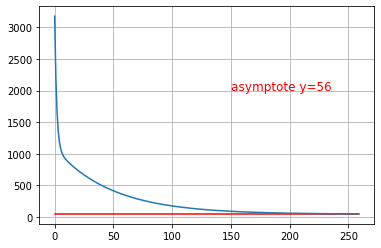

In [361]:
approx = int(np.mean(errors[200:]))+1
x_coord = range(len(errors))
plt.plot([0.0, len(errors)], [approx, approx], color='r')
plt.plot(x_coord, errors)
plt.text(150, 2000, f'asymptote y={approx}', c='r', fontsize=12)
plt.grid()